In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize, word_tokenize

import string, warnings, urllib3, locale

warnings.filterwarnings('ignore')
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [2]:
Punct_List = dict((ord(punct), None) for punct in string.punctuation + '¿¡')

def TxNormalize(text):
    
    return word_tokenize(text.lower().translate(Punct_List))

def respuesta(texto):
    Tokens_List.append(texto)
    TfidfVec = TfidfVectorizer(tokenizer = TxNormalize) 
    tfidf = TfidfVec.fit_transform(Tokens_List)
    Tokens_List.remove(texto)
    vals = cosine_similarity(tfidf[-1], tfidf)
    flat = vals.flatten()
    flat.sort()
    
    return Tokens_List[vals.argsort()[0][-2]]

def nice_axes(ax):
    plt.legend(loc = 'upper center'
               , bbox_to_anchor = (0.5, 1.1)
               , ncol = len(df.columns)
               , fancybox = False
               , shadow = True
               , fontsize = 20)

    [spine.set_visible(False) for spine in ax.spines.values()]

    ax.set_yticklabels([int(x) if x > 0 else '' for x in ax.get_yticks()])

    ax.tick_params(left = False, bottom = False)
    ax.grid(axis='y', alpha=0.25)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.set_xlabel('')

 #   ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

In [3]:
url = 'https://es.wikipedia.org/wiki/ISO_3166-2:ES'
comunidades = {}

urllib3.disable_warnings()
http = urllib3.PoolManager()
response = http.request('GET', url)
soup = BeautifulSoup(response.data, 'html.parser')

for i in soup.find_all('tr'):
    if len(i.find_all('td')) == 2:
        comunidades[i.find_all('td')[0].text[3:-1]] = i.find_all('td')[1].find_all('a', title = True )[0]['title']

comunidades 

{'AN': 'Andalucía',
 'AR': 'Aragón',
 'AS': 'Asturias',
 'CN': 'Canarias',
 'CB': 'Cantabria',
 'CM': 'Castilla-La Mancha',
 'CL': 'Castilla y León',
 'CT': 'Cataluña',
 'EX': 'Extremadura',
 'GA': 'Galicia',
 'IB': 'Islas Baleares',
 'RI': 'La Rioja (España)',
 'MD': 'Comunidad de Madrid',
 'MC': 'Región de Murcia',
 'NC': 'Comunidad Foral de Navarra',
 'PV': 'País Vasco',
 'VC': 'Comunidad Valenciana',
 'CE': 'Ceuta',
 'ML': 'Melilla'}

In [4]:
provincias = {}
InfoComunidad = {}

for i in soup.find_all('tr'):
    if len(i.find_all('td')) == 3:
        provincias[i.find_all('td')[0].find_all('tt')[0].text[3:]] = i.find_all('td')[1].find_all('a')[0].text
        InfoComunidad[i.find_all('td')[1].find_all('a')[0].text] = i.find_all('td')[2].find_all('a', title = True)[0]['title']

provincias

{'C': 'La Coruña',
 'VI': 'Álava',
 'AB': 'Albacete',
 'A': 'Alicante',
 'AL': 'Almería',
 'O': 'Asturias',
 'AV': 'Ávila',
 'BA': 'Badajoz',
 'PM': 'Baleares',
 'B': 'Barcelona',
 'BI': '[nota 4]',
 'BU': 'Burgos',
 'CC': 'Cáceres',
 'CA': 'Cádiz',
 'S': 'Cantabria',
 'CS': 'Castellón',
 'CR': 'Ciudad Real',
 'CO': 'Córdoba',
 'CU': 'Cuenca',
 'SS': '[nota 4]',
 'GI': 'Gerona',
 'GR': 'Granada',
 'GU': 'Guadalajara',
 'H': 'Huelva',
 'HU': 'Huesca',
 'J': 'Jaén',
 'LO': 'La Rioja',
 'GC': 'Las Palmas',
 'LE': 'León',
 'L': 'Lérida',
 'LU': 'Lugo',
 'M': 'Madrid',
 'MA': 'Málaga',
 'MU': 'Murcia',
 'NA': 'Navarra',
 'OR': 'Orense',
 'P': 'Palencia',
 'PO': 'Pontevedra',
 'SA': 'Salamanca',
 'TF': 'Santa Cruz de Tenerife',
 'SG': 'Segovia',
 'SE': 'Sevilla',
 'SO': 'Soria',
 'T': 'Tarragona',
 'TE': 'Teruel',
 'TO': 'Toledo',
 'V': 'Valencia',
 'VA': 'Valladolid',
 'ZA': 'Zamora',
 'Z': 'Zaragoza'}

## Poblacion

In [5]:
url = 'https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/2853.csv?nocab=1'

poblacion = pd.read_csv(url, error_bad_lines=False, sep=';', header=0)

poblacion = poblacion[(poblacion['Comunidades y Ciudades Autónomas'] != 'Total') 
                      & (poblacion['Periodo'] == 2020)].pivot(index = 'Comunidades y Ciudades Autónomas'
                                                             , columns = 'Sexo'
                                                             , values = 'Total')

Tokens_List = sent_tokenize(" ".join(review + '.' for review in comunidades.values()), 'spanish')
matriz = {}

for i in poblacion.index.values:
    matriz[i] = respuesta(i.replace('Balears','Baleares'))[:-1]
            
poblacion.index = poblacion.index.map(matriz)

for i in ['Hombres', 'Mujeres', 'Total']:
    poblacion[i] = poblacion[i].str.replace('.','').astype(int)


poblacion

Sexo,Hombres,Mujeres,Total
Comunidades y Ciudades Autónomas,,,
Andalucía,4170605,4293806,8464411
Aragón,656056,673335,1329391
Asturias,486066,532718,1018784
Islas Baleares,584298,587245,1171543
Canarias,1076185,1099767,2175952
Cantabria,282559,300346,582905
Castilla y León,1178846,1216072,2394918
Castilla-La Mancha,1023740,1021481,2045221
Cataluña,3826964,3953515,7780479


In [6]:
url = 'https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv'

df = pd.read_csv(url)

df = (df
      .assign(Provincia = df.provincia_iso.map(provincias))
      .assign(Comunidad = df.provincia_iso.map(provincias).map(InfoComunidad))
      .set_index(pd.to_datetime(df.fecha), drop = True)
     )

df.tail()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def,Provincia,Comunidad
fecha,,,,,,,,,,
2021-04-06,ZA,NC,50-59,2021-04-06,0,0,0,0,Zamora,Castilla y León
2021-04-06,ZA,NC,60-69,2021-04-06,0,0,0,0,Zamora,Castilla y León
2021-04-06,ZA,NC,70-79,2021-04-06,0,0,0,0,Zamora,Castilla y León
2021-04-06,ZA,NC,80+,2021-04-06,0,0,0,0,Zamora,Castilla y León
2021-04-06,ZA,NC,NC,2021-04-06,0,0,0,0,Zamora,Castilla y León


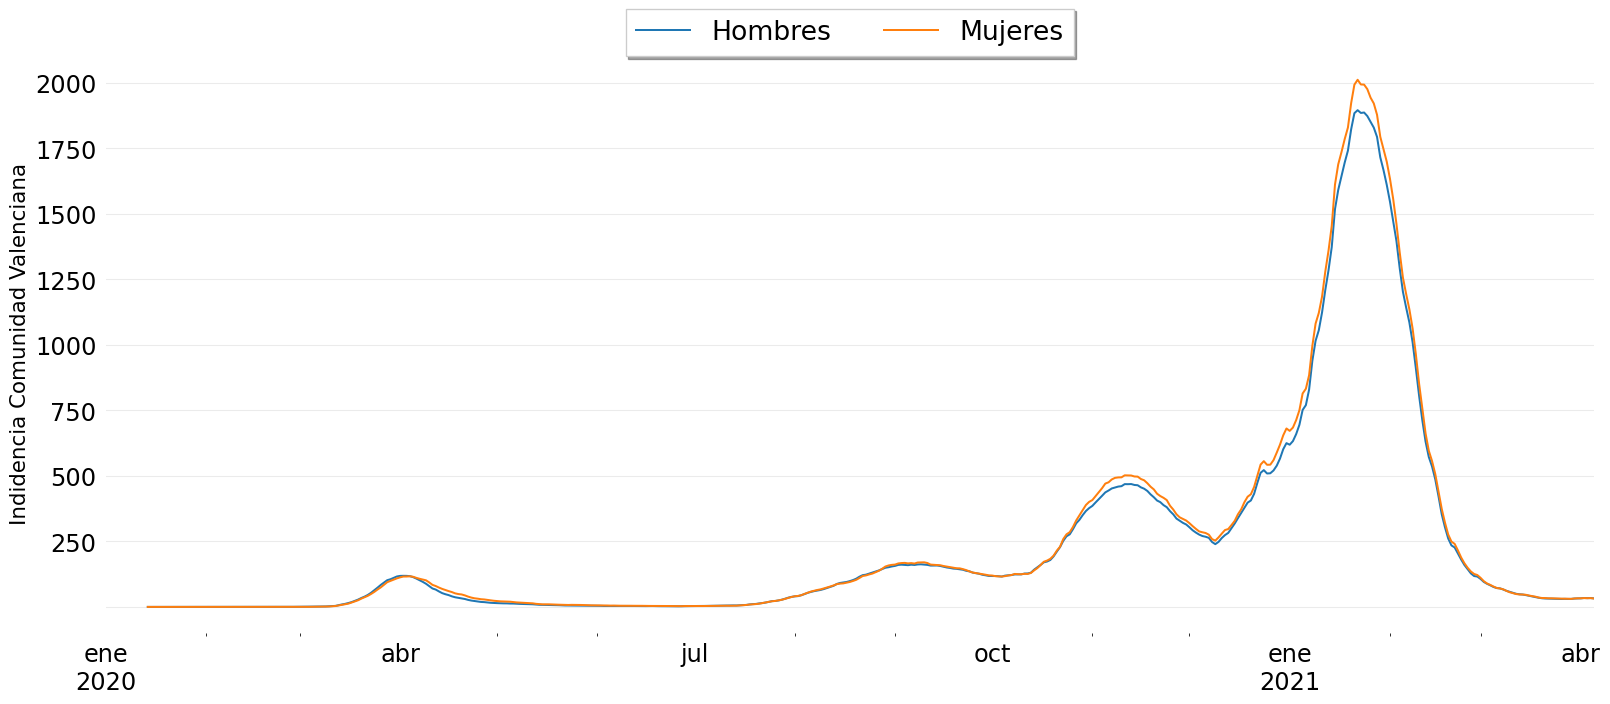

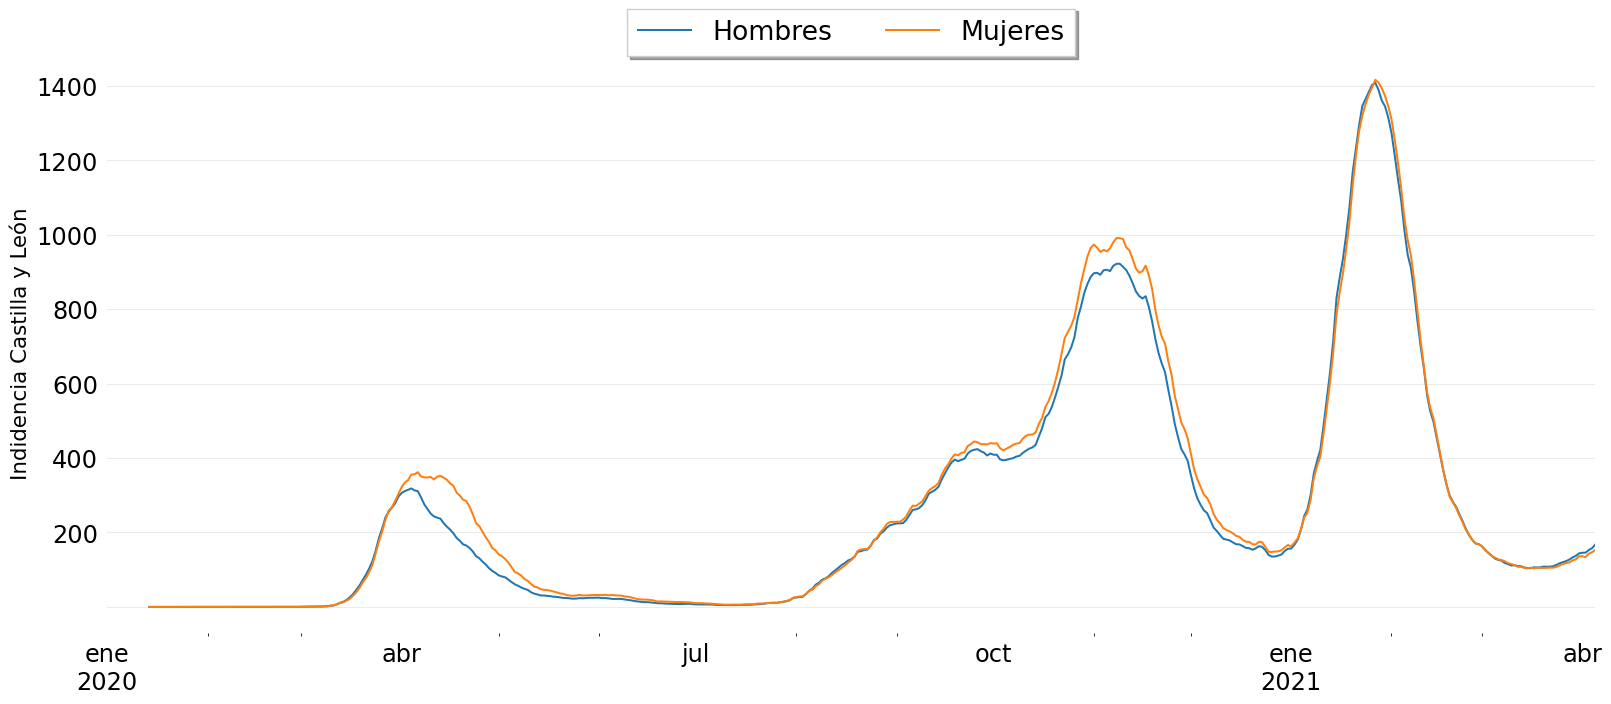

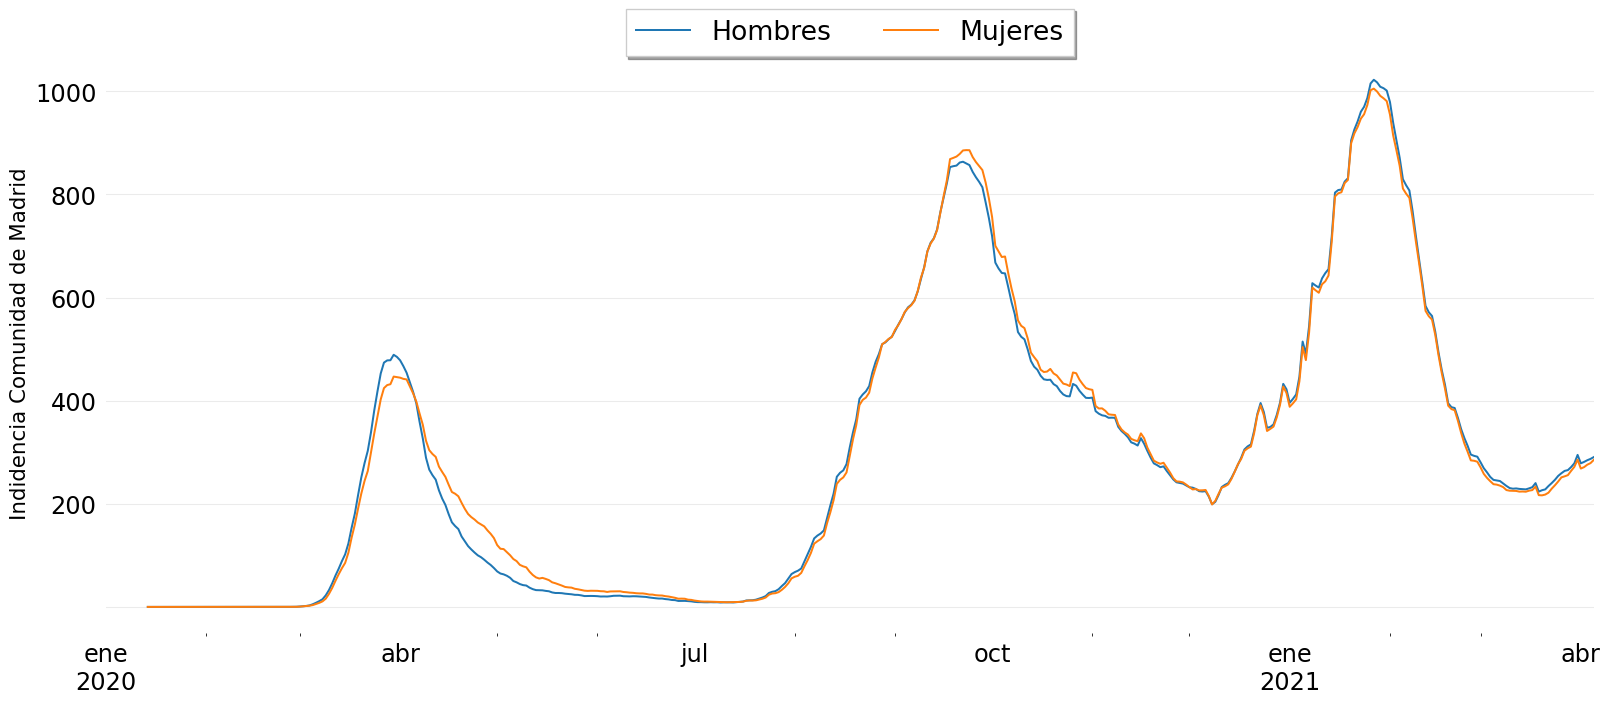

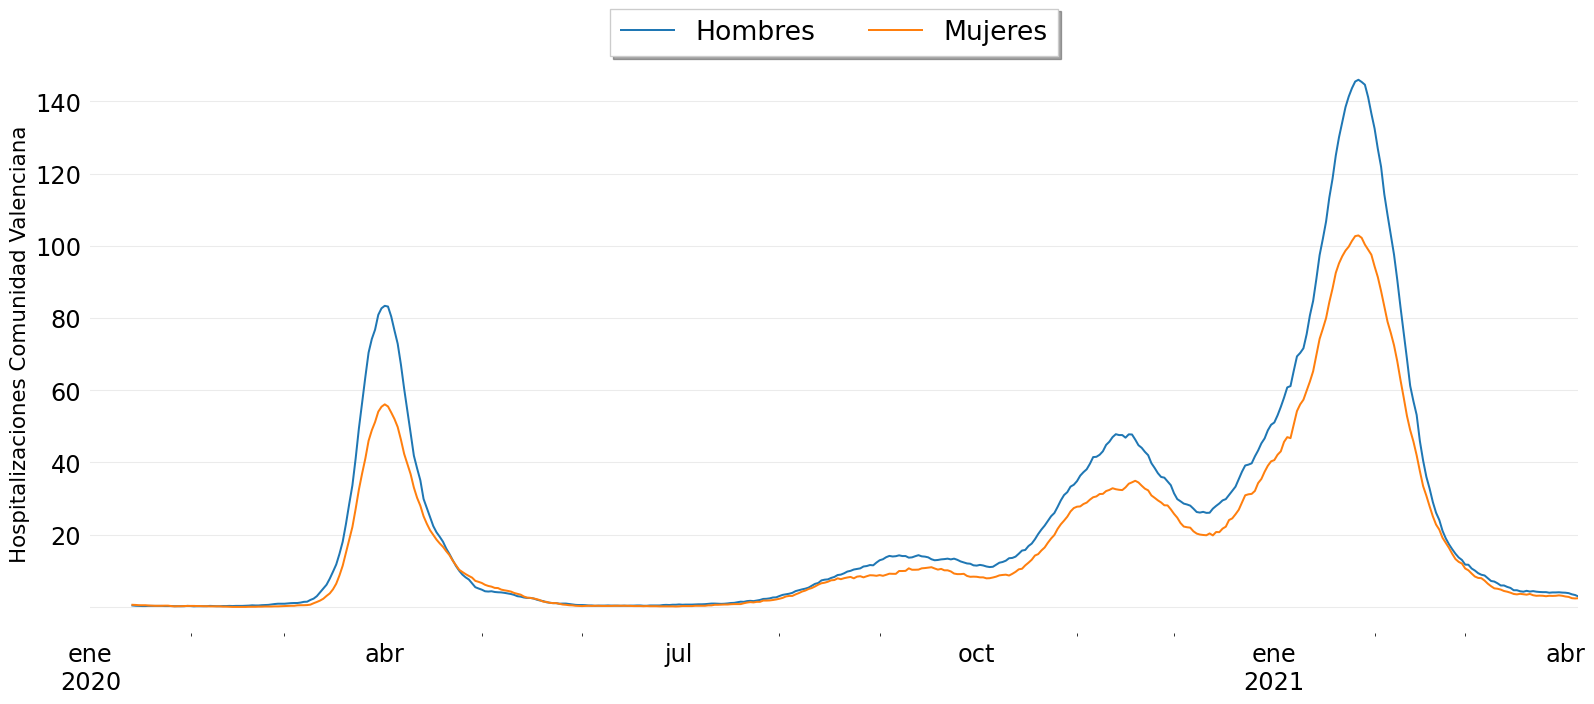

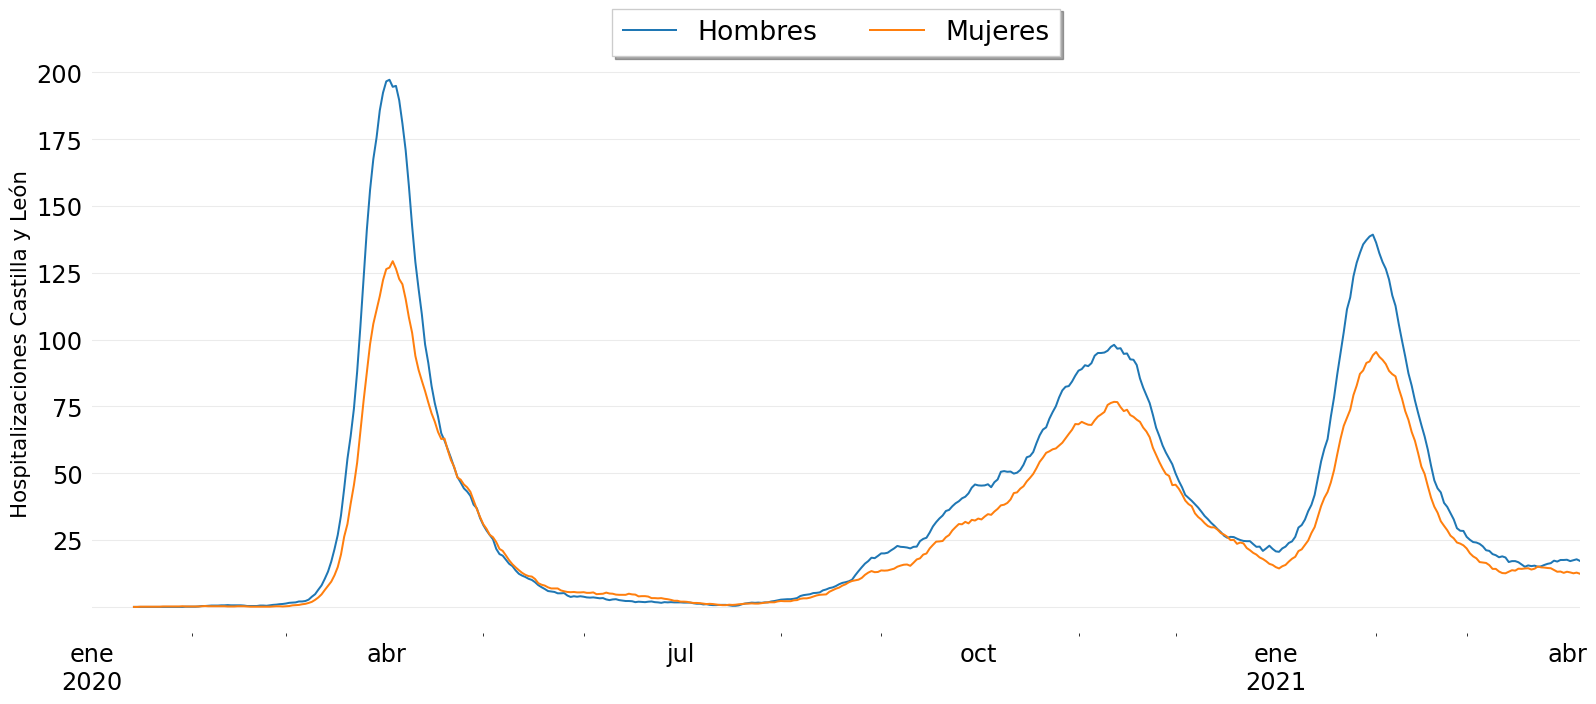

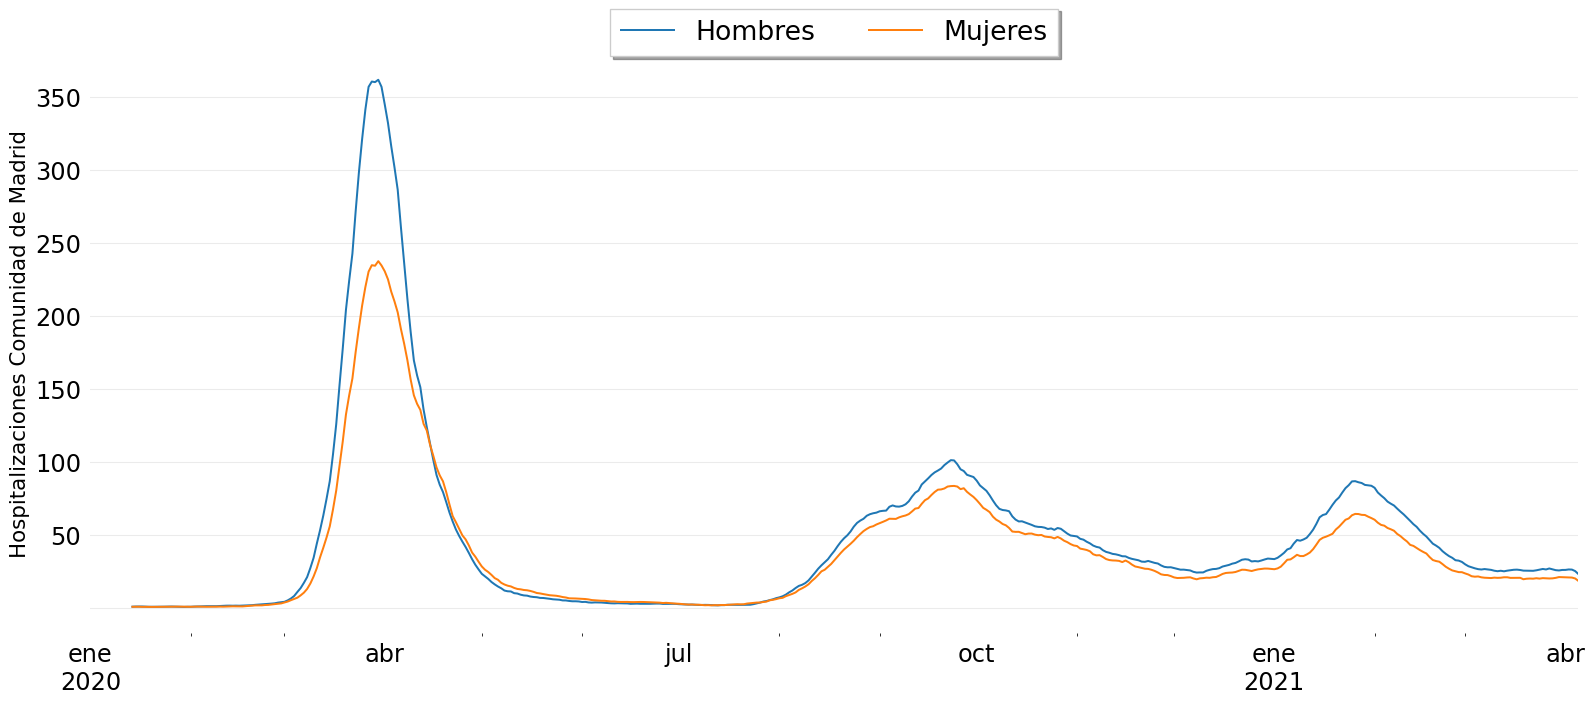

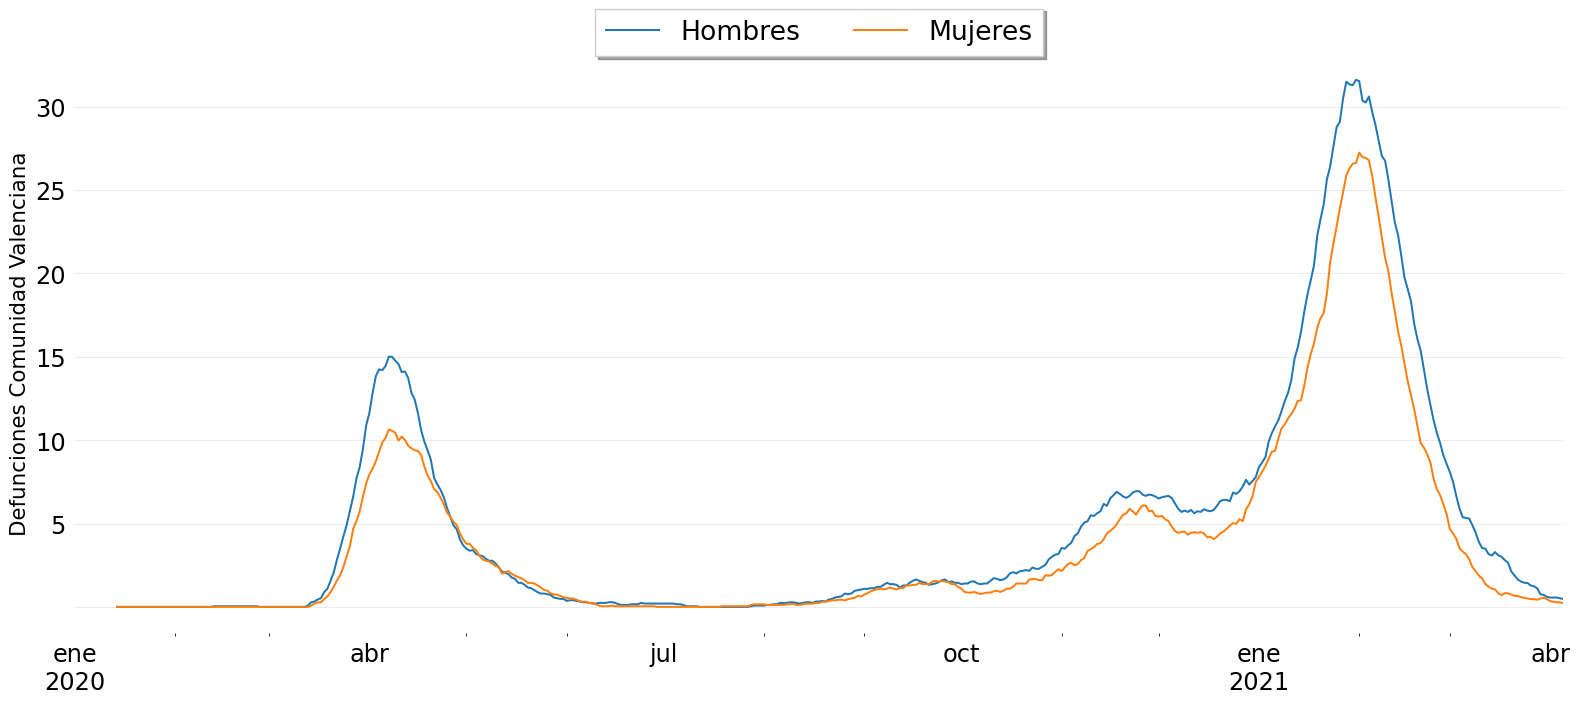

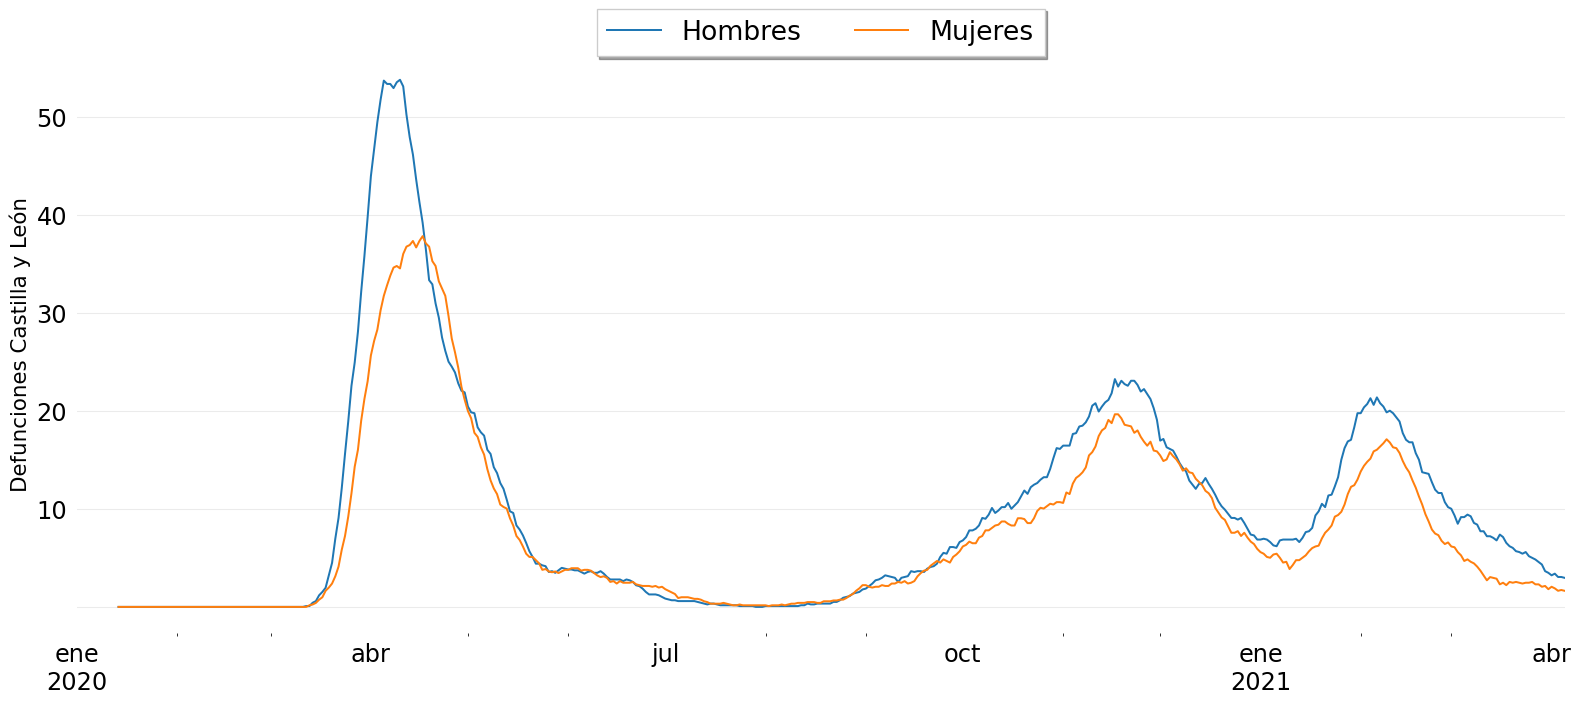

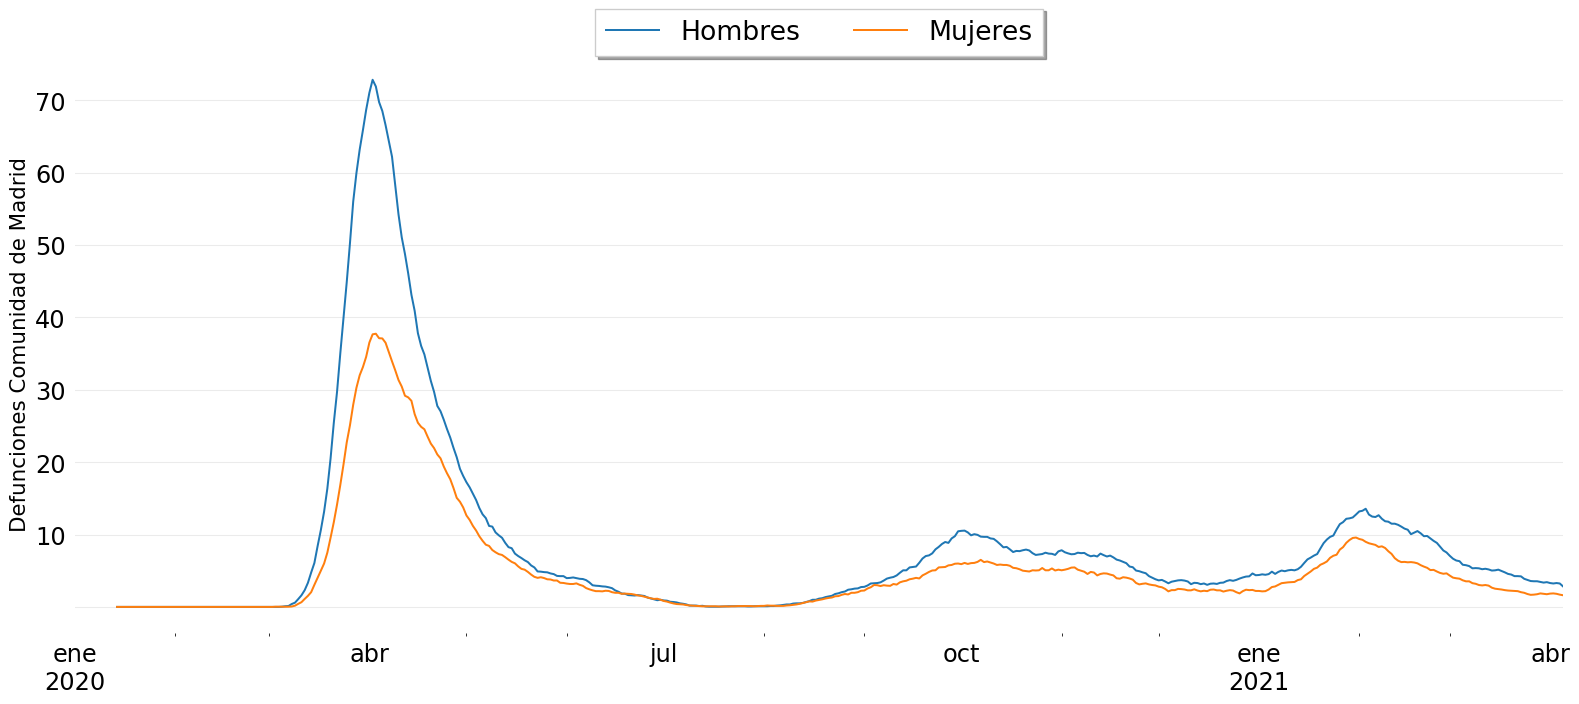

In [7]:

def make_df(df, sexo,kpi):
    
    return (df[df.sexo == ('H' if sexo == 'Hombres' else 'M')]
            .groupby('Comunidad')
            .resample('d')
            .agg({'num_casos':'sum'
                  , 'num_hosp':'sum'
                  , 'num_def':'sum'})
            .reset_index()
            .set_index('Comunidad')
            .merge(poblacion, left_index=True, right_index=True)
            .assign(Indidencia = lambda x: x.num_casos / x[sexo] * 1e5)
            .assign(Hospitalizaciones = lambda x: x.num_hosp / x[sexo] * 1e5)
            .assign(Defunciones = lambda x: x.num_def / x[sexo] * 1e5)
            .reset_index()
            .rename(columns={'index':'Comunidad'})
            .pivot(index = ['fecha'],columns = 'Comunidad', values= [kpi])
            .set_axis(df.Comunidad.sort_values().dropna().unique(), axis=1)
            .rolling(14)
            .sum()
           )[:-1]

for k in ['Indidencia', 'Hospitalizaciones','Defunciones']:
    for i in ['Comunidad Valenciana','Castilla y León','Comunidad de Madrid']:
        fig, ax = plt.subplots(figsize=(20,8)
                               , dpi = 96)


        make_df(df, 'Hombres',k)[i].plot(ax=ax, label ='Hombres')
        make_df(df, 'Mujeres',k)[i].plot(ax=ax, label = 'Mujeres')

        ax.set_ylabel(k + ' ' + i, fontsize = 16)
        nice_axes(ax)
        plt.show()


In [8]:
url = 'https://cnecovid.isciii.es/covid19/resources/casos_tecnica_ccaa.csv'
df = pd.read_csv(url)

df = (df
      .assign(ccaa_iso = df.ccaa_iso.map(comunidades))
      .set_index('ccaa_iso')
      .merge(poblacion.Total, left_index=True, right_index=True)
      .reset_index()
      .set_index('fecha')
      .rename(columns = {'index': 'Comunidad'
                         , 'num_casos': 'Casos'}))

df[df.Comunidad == 'Comunidad Valenciana'].tail(15)['Casos']

fecha
2021-03-23    124
2021-03-24    135
2021-03-25    130
2021-03-26    137
2021-03-27     97
2021-03-28     73
2021-03-29    125
2021-03-30    102
2021-03-31     91
2021-04-01     83
2021-04-02     53
2021-04-03     22
2021-04-04     72
2021-04-05     33
2021-04-06      0
Name: Casos, dtype: int64

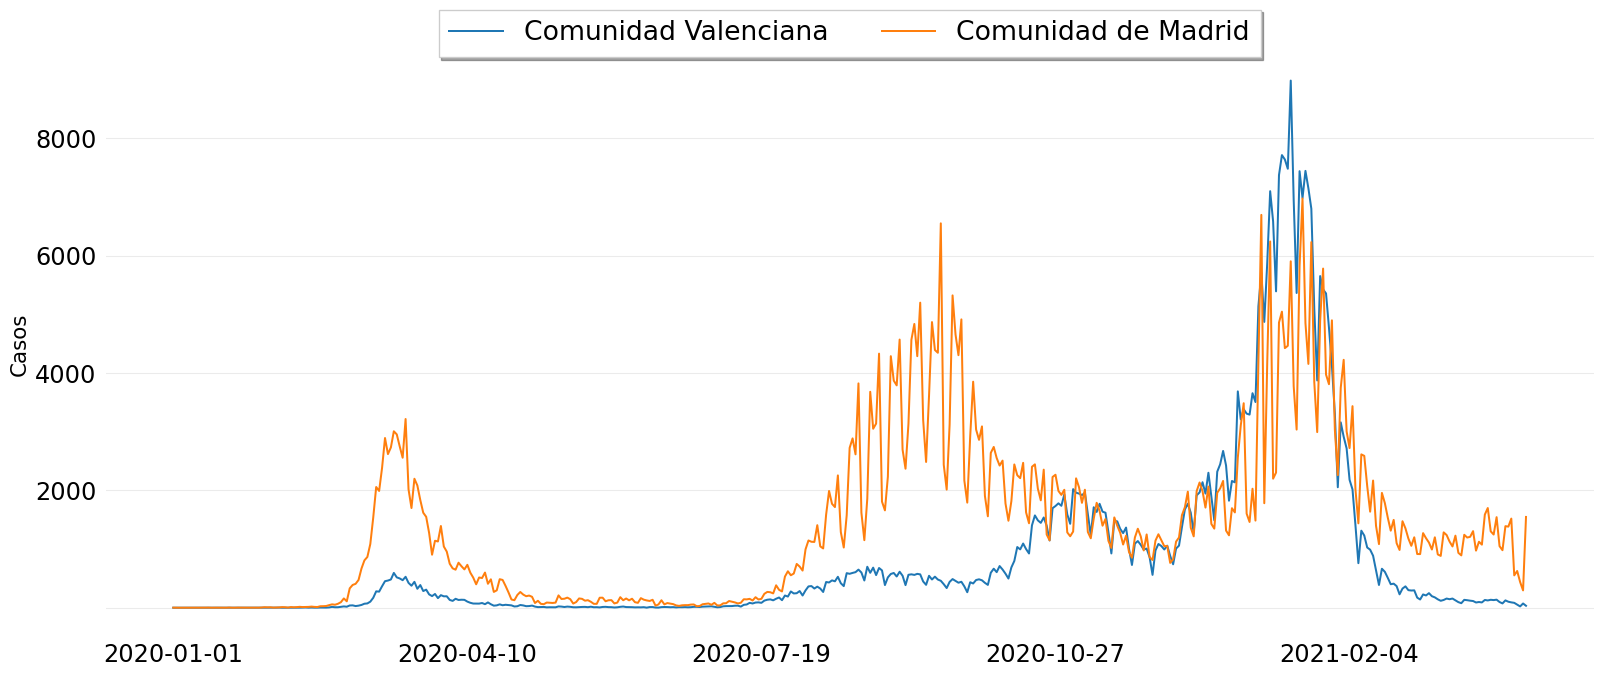

In [9]:
fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 96)

series = ['Comunidad Valenciana', 'Comunidad de Madrid']
for i in series:
    df[df.Comunidad == i][:-1]['Casos'].plot(label = i)

ax.set_ylabel('Casos', fontsize = 16)
nice_axes(ax)
plt.show()

In [10]:
df2 = (df
       .assign(Incidencia = lambda x: x.Casos / x.Total * 1e5)
       .pivot(columns='Comunidad', values = 'Incidencia')
       .rolling(14).sum()
      )[:-1]

df2.tail()

Comunidad,Andalucía,Aragón,Asturias,Canarias,Cantabria,Castilla y León,Castilla-La Mancha,Cataluña,Ceuta,Comunidad Foral de Navarra,Comunidad Valenciana,Comunidad de Madrid,Extremadura,Galicia,Islas Baleares,La Rioja (España),Melilla,País Vasco,Región de Murcia
fecha,,,,,,,,,,,,,,,,,,,
2021-04-01,150.666124,154.958173,161.761473,118.293051,122.833052,146.810872,109.572511,215.835040,330.158429,327.436452,29.758650,256.951147,111.279555,68.879522,60.006334,160.668180,411.135100,261.922518,61.670762
2021-04-02,145.184349,150.820940,160.092817,113.375663,122.833052,150.026013,104.585275,205.591455,333.721289,339.081998,29.046816,251.833069,117.764597,66.584771,58.128468,163.168852,397.354036,264.804747,62.861828
2021-04-03,143.908418,147.736821,149.001162,108.412318,122.489943,152.698339,101.064873,199.242232,347.972732,338.023312,27.563826,241.714907,118.892430,65.363372,55.994530,160.043012,384.721393,257.374002,61.406080
2021-04-04,143.081426,145.404926,138.302133,104.138327,120.259734,152.322543,95.930953,191.787678,361.036555,333.486087,27.207909,230.210293,115.884875,63.808864,53.348447,161.605932,385.869815,247.916689,58.957777
2021-04-05,131.976106,139.913690,121.419261,96.647353,118.544188,144.931893,87.178843,173.434052,353.910833,315.942147,25.250363,229.620312,110.151722,58.664181,48.483069,156.292003,354.862419,234.676452,54.921386


In [11]:
df2.loc[df2.index.max()].sort_values()

Comunidad
Comunidad Valenciana           25.250363
Islas Baleares                 48.483069
Región de Murcia               54.921386
Galicia                        58.664181
Castilla-La Mancha             87.178843
Canarias                       96.647353
Extremadura                   110.151722
Cantabria                     118.544188
Asturias                      121.419261
Andalucía                     131.976106
Aragón                        139.913690
Castilla y León               144.931893
La Rioja (España)             156.292003
Cataluña                      173.434052
Comunidad de Madrid           229.620312
País Vasco                    234.676452
Comunidad Foral de Navarra    315.942147
Ceuta                         353.910833
Melilla                       354.862419
Name: 2021-04-05, dtype: float64

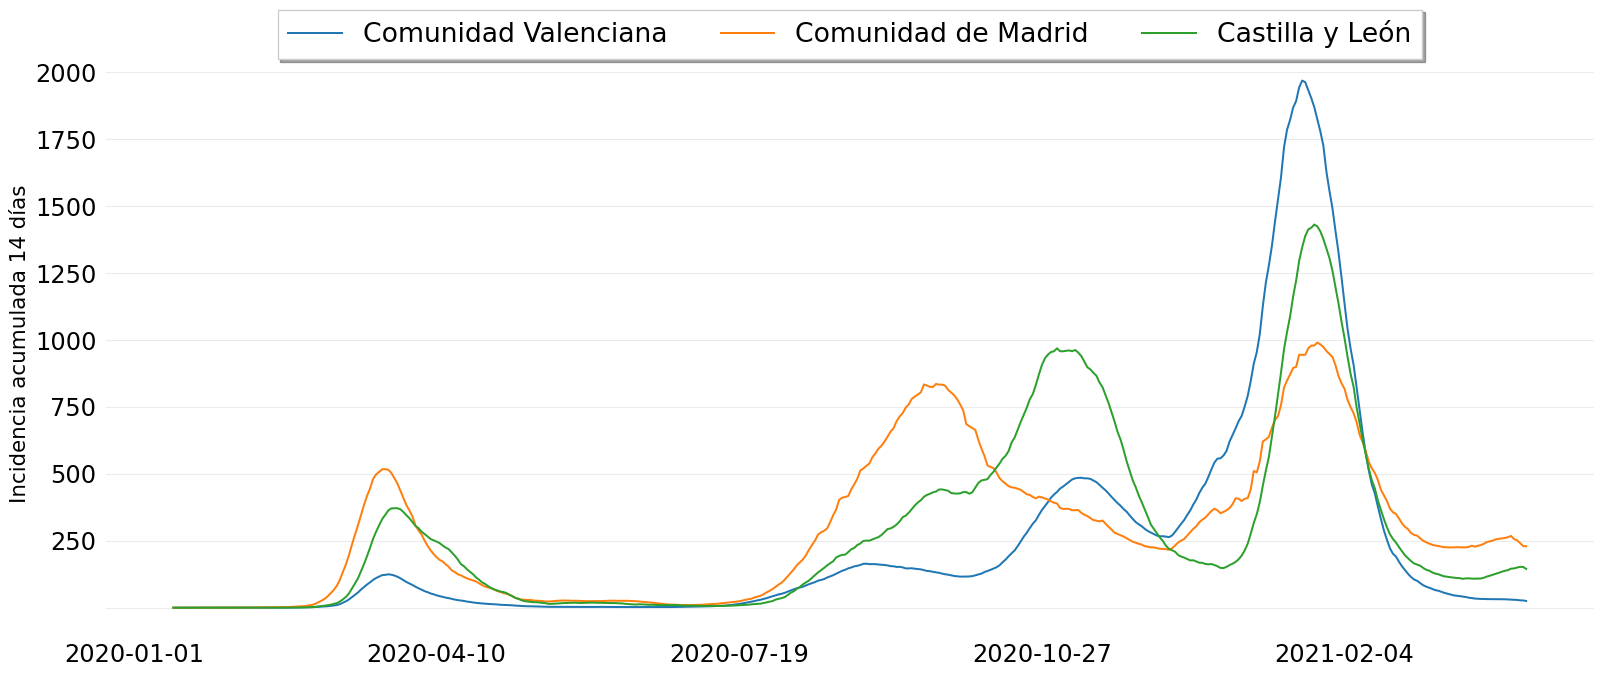

In [12]:
series.append('Castilla y León')

fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 96)

for i in series:
    df2[i].plot()

ax.set_ylabel('Incidencia acumulada 14 días', fontsize = 16)
nice_axes(ax)
plt.show()

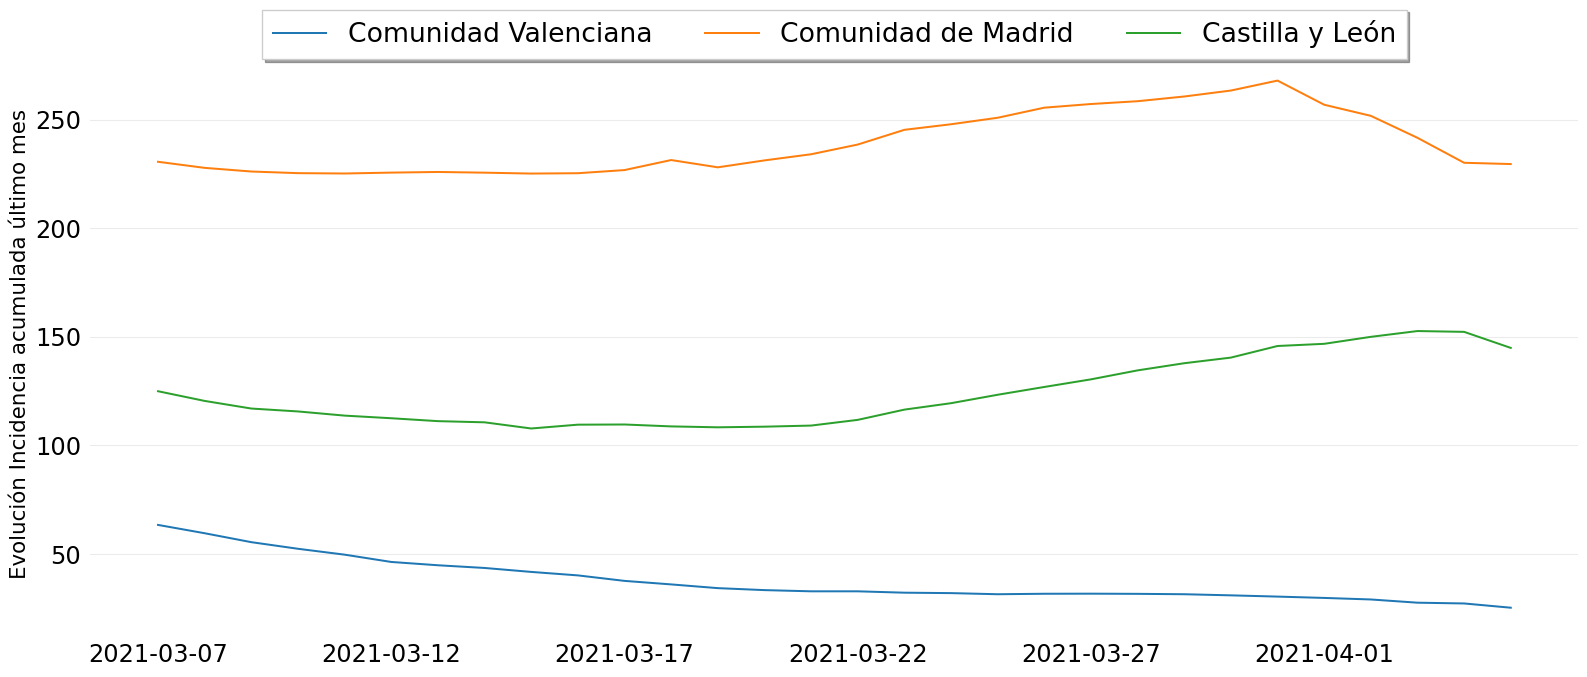

In [13]:
fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 96)

for i in series:
    df2[-30:][i].plot()

ax.set_ylabel('Evolución Incidencia acumulada último mes', fontsize = 16)
nice_axes(ax)